Moderate

Accuracy: 0.9975

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1191
         1.0       0.99      1.00      1.00      1197
         2.0       1.00      1.00      1.00      1212

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/francis/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



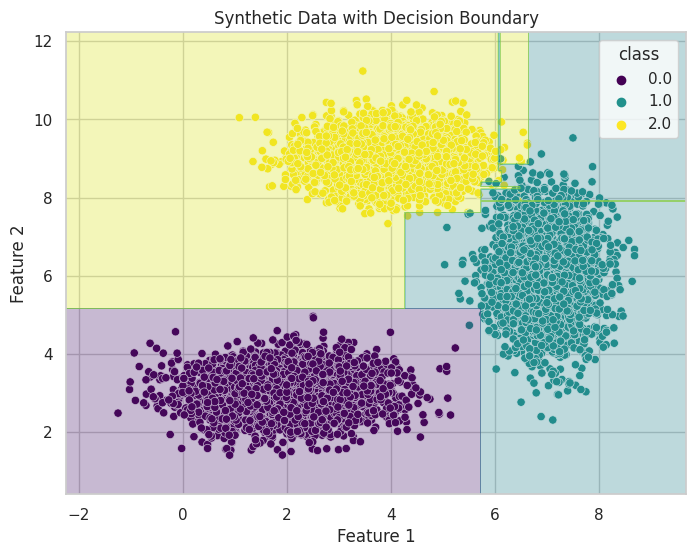

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Define classes and their properties
class_list = ["Class A", "Class B", "Class C"]
class_properties = {
    0: {'mean': [2, 3], 'std': [1, 0.5]},
    1: {'mean': [7, 6], 'std': [0.5, 1]},
    2: {'mean': [4, 9], 'std': [0.8, 0.5]}
}

# Generate synthetic data for a classification task
num_samples_per_class = 3000
num_features = 2
num_classes = len(class_list)

data = []
for class_id in class_properties.keys():
    mean = class_properties[class_id]['mean']
    std = class_properties[class_id]['std']
    samples = np.random.normal(mean, std, size=(num_samples_per_class, num_features))
    labels = np.full((num_samples_per_class, 1), class_id)
    class_data = np.hstack((samples, labels))
    data.append(class_data)

# Combine data from all classes
data = np.vstack(data)
np.random.shuffle(data)

# Create a DataFrame
columns = [f'feature_{i+1}' for i in range(num_features)] + ['class']
df = pd.DataFrame(data, columns=columns)

# Split data into features and labels
X = df.iloc[:, :-1]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the trained model to a file using joblib
model_filename = "decision_tree_model.joblib"
joblib.dump(clf, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature_1', y='feature_2', hue='class', data=df, palette='viridis')
plt.title('Synthetic Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision regions
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = loaded_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()

# Plot interactive scatter plot using plotly
fig = px.scatter(df, x='feature_1', y='feature_2', color='class', title='Scatter Plot of Features with Classes')
fig.show()


Easy

Mean Squared Error: 0.8573724665817535


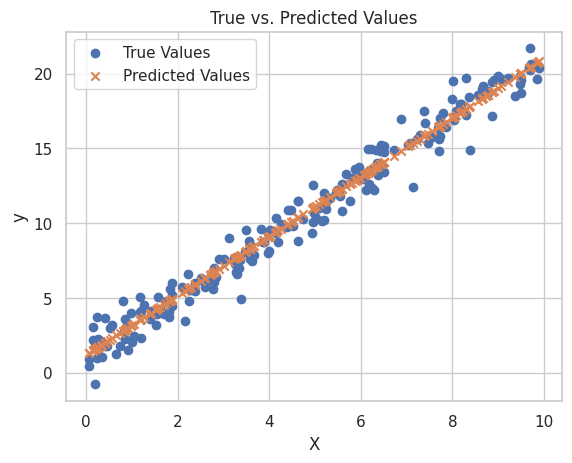

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for a linear relationship
num_samples = 1000
X = np.random.uniform(0, 10, num_samples)
noise = np.random.normal(0, 1, num_samples)
y = 2 * X + 1 + noise  # Linear relationship with some noise

# Create a DataFrame
df = pd.DataFrame({'X': X, 'y': y})

# Split data into features and labels
X = df[['X']]
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to a file using joblib
model_filename = "linear_regression_model.joblib"
joblib.dump(model, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the true vs. predicted values
plt.scatter(X_test, y_test, label='True Values')
plt.scatter(X_test, y_pred, label='Predicted Values', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

# Plot interactive scatter plot using plotly
fig = px.scatter(df, x='X', y='y', title='Scatter Plot of X vs. y')
fig.show()


First output.
Maybe Complex
Seems comples

Accuracy: 0.891
F1 Score: 0.89
Confusion Matrix:
[[294   8  66   1   6]
 [ 20 362   4   4   0]
 [ 55   6 334   8   7]
 [  1  14   0 399   2]
 [  4   0  11   1 393]]


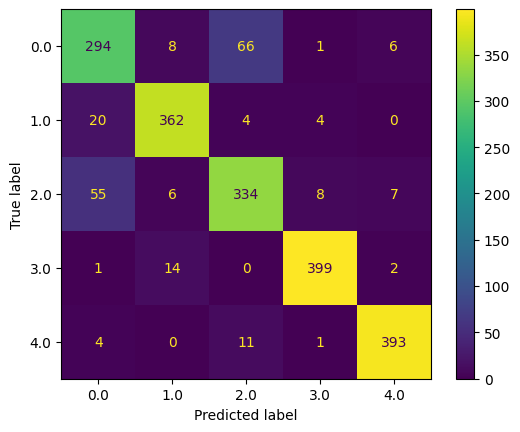

/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francis/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

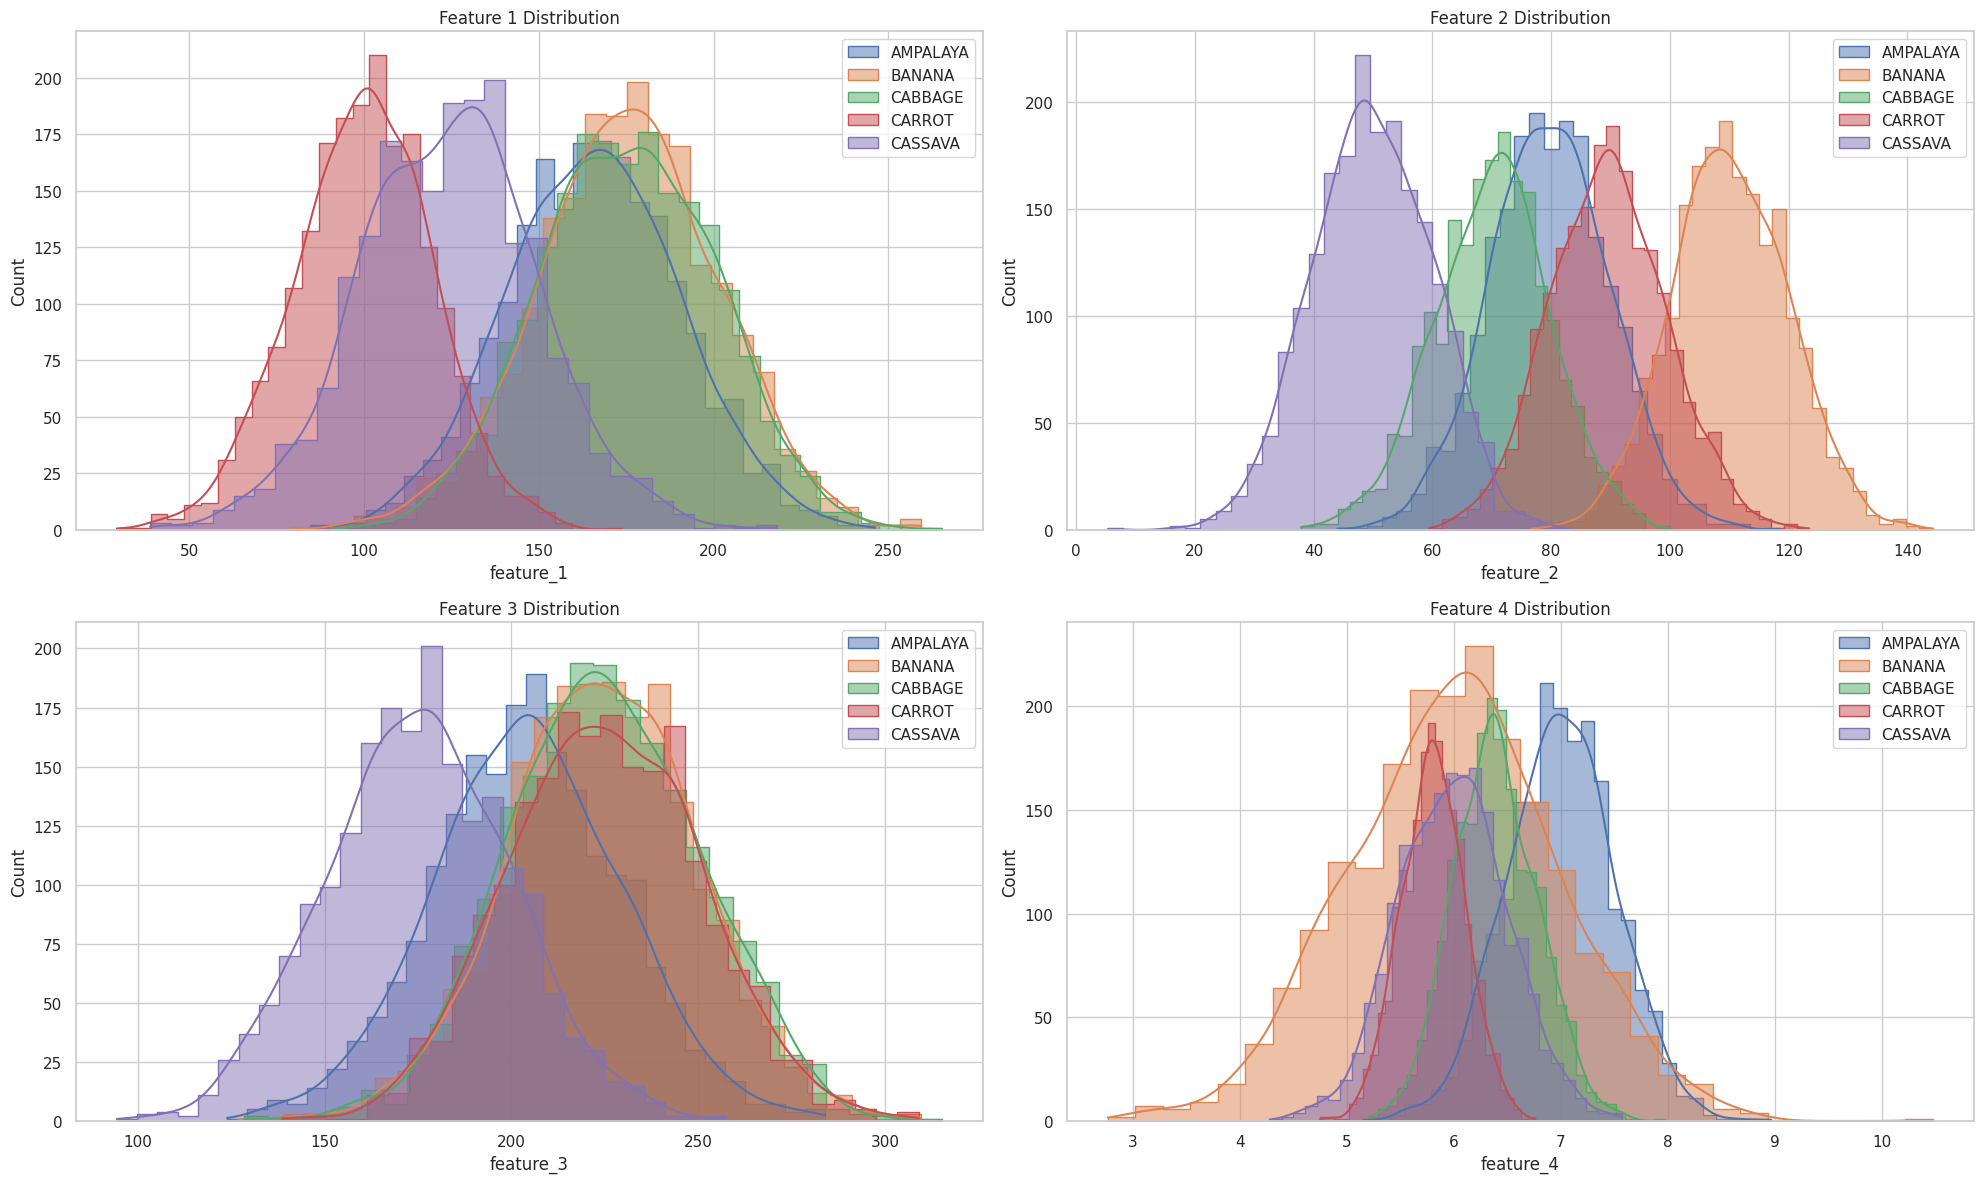

Predicted Labels for New Samples:
[3. 4.]


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Define the class list and properties
class_list = ["AMPALAYA", "BANANA", "CABBAGE", "CARROT", "CASSAVA"]
class_properties = {
    0: {'mean': [165, 80, 205, 7], 'std': [25, 10, 25, 0.5]},
    1: {'mean': [175, 110, 225, 6], 'std': [25, 10, 25, 1]},
    2: {'mean': [175, 70, 225, 6.4], 'std': [25, 10, 25, 0.4]},
    3: {'mean': [100, 90, 225, 5.8], 'std': [20, 10, 25, 0.3]},
    4: {'mean': [125, 50, 175, 6.0], 'std': [25, 10, 25, 0.5]}
}

# Generate synthetic data
num_samples_per_class = 2000
num_features = 4
num_classes = 5

data = []
for class_id in class_properties.keys():
    mean = class_properties[class_id]['mean']
    std = class_properties[class_id]['std']
    samples = np.random.normal(mean, std, size=(num_samples_per_class, num_features))
    labels = np.full((num_samples_per_class, 1), class_id)
    class_data = np.hstack((samples, labels))
    data.append(class_data)

# Combine data from all classes
data = np.vstack(data)
np.random.shuffle(data)

# Create a DataFrame
columns = [f'feature_{i+1}' for i in range(num_features)] + ['class']
df = pd.DataFrame(data, columns=columns)

# Split data into features and labels
X = df.iloc[:, :-1]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train.values, y_train.values)

# Save the trained model to a file using joblib
model_filename = str(type(clf).__name__ + ".joblib")
joblib.dump(clf, model_filename)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Predict on the test set
y_pred = loaded_model.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()

# Plot histograms
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))
for feature_idx in range(num_features):
    plt.subplot(2, 2, feature_idx + 1)
    for class_id in range(num_classes):
        sns.histplot(df[df['class'] == class_id][f'feature_{feature_idx+1}'], label=f'{class_list[class_id]}', kde=True, element="step", bins=30)
    plt.title(f'Feature {feature_idx+1} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

# Predicting new samples
new_samples = np.array([[104.046576, 106.318569, 206.674175, 6.345419],  # label 3
                        [126.829925, 48.497570, 204.792687, 5.958141]])  # label 4
predicted_labels = clf.predict(new_samples)
print("Predicted Labels for New Samples:")
print(predicted_labels)

# Plot interactive histograms using plotly
fig = px.scatter_3d(df, x='feature_1', y='feature_2', z='feature_3', color='class',
                    labels={'feature_1': 'Feature 1', 'feature_2': 'Feature 2', 'feature_3': 'Feature 3', 'class': 'Class'},
                    title='3D Scatter Plot of Features')
fig.show()

fig = px.histogram(df, x="feature_1", color="class", marginal="rug", nbins=30, barmode="overlay",
                   labels={"feature_1": "Feature 1 Value", "count": "Frequency"},
                   title="Feature 1 Distribution by Class")
fig.update_layout(showlegend=True)
fig.show()
